In [1]:
import random
import math
import numpy as np
import PIL
from PIL import Image
import matplotlib
import matplotlib.cm as cm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T
from numpy import array

In [2]:
import random 
numprocess = 5
file_address = [] 
file_size = [] 
def get_fileAddress(id):
    #print(id)
    global file_address, file_size
    start_index = 0
    for i in range(id):
        start_index += file_size[i]
    start_Address = file_address[start_index-1]
    start_Address.append(file_size[id])
    return start_Address

def makefile(id,size):
    global file_address
    global file_size
    file_size.append(size)
    while(True):
        allotted_platter = random.randrange(1,14,1)
        allotted_track = random.randrange(1,10,1)
        allotted_sector = random.randrange(1,360,1)
        for i in range(size):
            if [allotted_platter,allotted_track,(allotted_sector+i)%360] in file_address:
                print('Contiguous memory couldn\'t be allocated. Trying again')
                continue
        for i in range(size):
            file_address.append([allotted_platter,allotted_track,(allotted_sector+i)%360])
        start_address = [allotted_platter,allotted_track, allotted_sector]
        print('Memory block allotted starting from', start_address, 'of size', size)
        break

def createFile():
    n = 50
    
    for i in range(n):
        makefile(i,random.randint(1,20))

createFile()

Memory block allotted starting from [2, 1, 231] of size 10
Memory block allotted starting from [12, 4, 206] of size 10
Memory block allotted starting from [4, 5, 302] of size 8
Memory block allotted starting from [4, 5, 289] of size 7
Memory block allotted starting from [13, 2, 337] of size 10
Memory block allotted starting from [1, 6, 341] of size 17
Memory block allotted starting from [10, 5, 341] of size 4
Memory block allotted starting from [1, 1, 195] of size 5
Memory block allotted starting from [3, 5, 356] of size 19
Memory block allotted starting from [10, 4, 311] of size 4
Memory block allotted starting from [9, 4, 253] of size 16
Memory block allotted starting from [13, 5, 152] of size 7
Memory block allotted starting from [3, 3, 226] of size 20
Memory block allotted starting from [2, 7, 229] of size 18
Memory block allotted starting from [1, 2, 354] of size 2
Memory block allotted starting from [9, 2, 19] of size 8
Memory block allotted starting from [8, 9, 225] of size 19
M

In [3]:
class disjointset:

    def __init__(self, n):
        self.n=n
        self.parent = list(range(n))
        self.rank = [0 for x in range(n)]
 
    def findset(self, v):
        if not v == self.parent[v]:
            self.parent[v] = self.findset(self.parent[v])
        return self.parent[v]
 
    def union(self, x, y):
        xRoot = self.findset(x)
        yRoot = self.findset(y)
        if xRoot == yRoot:
            return
        if self.rank[xRoot] > self.rank[yRoot]:
            self.parent[yRoot] = xRoot
        else:
            self.parent[xRoot] = yRoot
            if self.rank[xRoot] == self.rank[yRoot]:
                self.rank[yRoot] += 1
 
    def printParent(self):
        v=[0]*self.n
        s=[]
        while 0 in v:
            x=v.index(0)
            p=self.parent[x]
            v[x]=1
            l=[x]
            for i in range(self.n):
                if v[i]==0 and self.parent[i]==p:
                    v[i]=1
                    l.append(i)
            s.append(l)
        #print(s)
        return s

def dsu(u,v,s):

    e=[]
    x=[]
    x.append(u)
    x.append(v)
    e.append(x)
    s.union(e[0][0],e[0][1])

    


In [4]:
import time
class HardDiskDrive():
    # Returns time taken for read/write operations
    
    def __init__(self):
        self.tracktime = 100 # stores time needed to move between two adjacent tracks to read
        self.sectortime = 50 # stores time needed to move between two adjacent sectors to read
        self.readtime = 1
        self.writetime = 2
        self.curtrack = [1] * 14 # stores current track of read/write head of all 14 platters
        self.cursector = [1] * 14 # stores current sector of read/write head of all 14 platters

        
    def calculateTimeRead(self,physicalAddr):
        # Calculates time to read from the specified physical address
        time.sleep(1)
        #print(physicalAddr)
        # Find filesize given files list and file id
        filesize = physicalAddr[3]

        # Get platter, track and sector number
        platter = physicalAddr[0]
        track = physicalAddr[1]
        sector = physicalAddr[2]

        ttime = self.tracktime * abs( track - self.curtrack[platter-1] )  # Time taken for read/write head to move to the required track for the given platter
        stime = self.sectortime * (( sector - self.cursector[platter-1] ) % 360 )  # Time taken for read/write head to move to the required sector for the given platter
        etime = filesize * ( self.readtime + self.sectortime )  # Time taken for read/write head to move to different sectors to read

        totaltime = ttime + stime + etime  # Total time taken

        self.curtrack[platter-1] = track # Sets current track of platter to the track from physical address
        self.cursector[platter-1] = ( sector + filesize ) % 360  # Sets current sector of platter to sector the read/write head moves to after reading

        return totaltime

    def calculateTimeWrite(self,physicalAddr):
        # Calculates time to write to the specified physical address
        time.sleep(1)
        #print('physical address',physicalAddr)
        # Find filesize given files list and file id
        filesize = physicalAddr[3]

        # Get platter, track and sector number
        platter = physicalAddr[0]
        track = physicalAddr[1]
        sector = physicalAddr[2]

        ttime = self.tracktime * abs( track - self.curtrack[platter-1] ) # Time taken for read/write head to move to the required track for the given platter
        stime = self.sectortime * (( sector - self.cursector[platter-1] ) % 360 ) # Time taken for read/write head to move to the required sector for the given platter
        etime = filesize * ( self.writetime + self.sectortime ) # Time taken for read/write head to move to different sectors to read

        totaltime = ttime + stime + etime # Total time taken

        self.curtrack[platter-1] = track  # Sets current track of platter to the track from physical address
        self.cursector[platter-1] = ( sector + filesize ) % 360  # Sets current sector of platter to sector the read/write head moves to after reading

        return totaltime


In [5]:
class Process: 
    def get_request(self):
        
        request_type = random.randint(0,1) #0 - read, 1 - write
        amount = random.uniform(1,1000)
        file_no=0
        if request_type == 0:
            file_no = random.randint(1,49)
        else:
            file_no =random.randint(0,49)
        return [request_type,amount,file_no] 

In [6]:
def get_faddress(id):
    return [3,4,100,5]

In [7]:
#Environment
class Devices:
    def __init__(self):
        self.p1= Process()
        self.p2= Process()
        self.p3= Process()
        self.p4= Process()
        self.p5= Process()
        self.devices = [self.p1,self.p2,self.p3,self.p4,self.p5]
    
    def Generate_Requests(self):      
        request_buffer = []
        for i in self.devices:
            x = i.get_request()
            #print(x)
            x[2] = get_fileAddress(x[2])
            if x!=None:
                request_buffer.append(x)

        return request_buffer

In [8]:
class Buffer:
    def __init__(self):
        dev = Devices()
        self.buff = dev.Generate_Requests()
        #print('ewfew',self.buff)
        self.i=0
        self.j=0
        self.size = len(self.buff)
        self.store_actions=[]
        #print('size',self.size)
    def request_disk(self):
        
        s=disjointset(numprocess)

        for i in range(int((numprocess*(numprocess-1))/2)):
            if self.store_actions[i]==1:
                k = int(i/self.size)
                j = int(i%self.size)
                #print('k','j',k,j)
                dsu(k,j,s)
                
        merge_buffer = s.printParent()
        print("After merging",merge_buffer)
        
        #print(merge_buffer)
        
        #print(self.buff)
        
        hdd1 = HardDiskDrive()
        hdd2 = HardDiskDrive()
        timedelay = 10
        time1 = 0
        responsetime=0
        #print(merge_buffer)
        for i in range(len(merge_buffer)):
            x=0
            for j in range(len(merge_buffer[i])):
                #print(merge_buffer[i][j])
                if self.buff[merge_buffer[i][j]][0]==0:
                    x = x + hdd1.calculateTimeRead(self.buff[merge_buffer[i][j]][2])
                elif self.buff[merge_buffer[i][j]][0]==1:
                    x = x + hdd1.calculateTimeWrite(self.buff[merge_buffer[i][j]][2])
            responsetime+=x*len(merge_buffer[i])
            
            time1 += x #+ timedelay
            
        time2 = 0
        for i in range(len(self.buff)):
            if self.buff[i][0]==0:
                    time2 = time2 + hdd2.calculateTimeRead(self.buff[i][2])
            elif self.buff[i][0]==1:
                time2 = time2 + hdd2.calculateTimeWrite(self.buff[i][2])
            time2 = time2 + timedelay
            
        time = time2 - time1
        ans = time1/responsetime
        #print('time',time1,time1/responsetime)          
        if ans>0.21:
            ans=1
        else:
            ans=-1
        
        return ans

    def getRequest(self,action):
        self.store_actions.append(action)
        if self.i==self.size-1 and self.j == self.size-1:
            #print('yes')
            time_taken = self.request_disk()
            return _,time_taken
        req1 = self.buff[self.i]
        req2 = 0
        
        if self.j< self.size-1:
            req2 = self.buff[self.j]
            self.j+=1
        else:
            self.i+=1
            self.j=0
            req1 = self.buff[self.i]
            req2 = self.buff[self.j]
        '''x = random.randint(1,14)
        y = random.randint(1,10)
        z = random.randint(1,360)
        a = random.randint(1,14)
        b = random.randint(1,10)
        c = random.randint(1,360)'''
        #print(req1,req2)
        return [req1[0],req1[1],req1[2],req2[0],req2[1],req2[2]],0
    

In [9]:

class environment:
    def __init__(self):
        self.counter = 0
        self.b = None
    def reset(self):
        self.b = Buffer()
        self.counter = 0
        self.counter += 1
        a,reward = self.b.getRequest(0)
        state = [a[0],a[2][0]/14,a[2][1]/10,a[2][2]/360,a[3],a[5][0]/14,a[5][1]/10,a[5][2]/360]
        done = False
        state = array(state)
        return state,reward,done,_ 
    def step(self,action):
        #b = Buffer()
        self.counter+=1
        a,reward = self.b.getRequest(action)
        #print("a",a)
        if self.counter >=(numprocess*(numprocess)):
            done = True
            return array([0,0,0,0,0,0,0,0]),reward,done,_ 
        state = [a[0],a[2][0]/14,a[2][1]/10,a[2][2]/360,a[3],a[5][0]/14,a[5][1]/10,a[5][2]/360]
        done = False
        
        state = array(state)
        return state,reward,done,_ 

In [10]:
class model(nn.Module):
    def __init__(self):
        super(model,self).__init__()
        self.hidden_size=512
        self.rnn= nn.RNN(input_size=8, hidden_size=512,num_layers=2,batch_first=True)
        self.fc = nn.Linear(512, 2)
        
    def init_hidden(self,batch_size):
        return (torch.zeros(2,batch_size, self.hidden_size))
    
    def forward(self,x,hidden):
        x=x.reshape(x.shape[0],1,8)
        x,h_0=self.rnn(x,hidden)
        return self.fc(x.contiguous().view(x.size(0), -1))
        

In [11]:
env = environment()

In [12]:

policy=model()
target_net=model()
target_net.load_state_dict(policy.state_dict())
target_net.eval()
optimizer = optim.RMSprop(policy.parameters())
criterion = F.smooth_l1_loss
memory=10000
store=[[dict()] for i in range(memory)]
gamma=0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200

In [13]:
def addEpisode(ind,prev,curr,reward,act):
    if len(store[ind]) ==0:
        store[ind][0]={'prev':prev,'curr':curr,'reward':reward,'action':act}
    else:
        store[ind].append({'prev':prev,'curr':curr,'reward':reward,'action':act})

In [14]:
def trainNet(total_episodes):
    if total_episodes==0:
        return
    ep=random.randint(0,total_episodes-1)
    if len(store[ep]) < 8:
        return
    else:  
        start=random.randint(1,len(store[ep])-1)
        length=len(store[ep])
        inp=[]
        target=[]
        rew=torch.Tensor(1,length-start)
        actions=torch.Tensor(1,length-start)
        
        for i in range(start,length,1):
            inp.append((store[ep][i]).get('prev'))
            target.append((store[ep][i]).get('curr'))
            rew[0][i-start]=store[ep][i].get('reward')
            actions[0][i-start]=store[ep][i].get('action')
        targets = torch.Tensor(target[0].shape[0],target[0].shape[1],target[0].shape[2])
        torch.cat(target, out=targets)
        ccs=torch.Tensor(inp[0].shape[0],inp[0].shape[1],inp[0].shape[2])
        torch.cat(inp, out=ccs)
        hidden = policy.init_hidden(length-start)
        qvals= target_net(targets,hidden)
        actions=actions.type('torch.LongTensor')
        actions=actions.reshape(length-start,1)
        hidden = policy.init_hidden(length-start)
        inps=policy(ccs,hidden).gather(1,actions)
        p1,p2=qvals.detach().max(1)
        targ = torch.Tensor(1,p1.shape[0])   
        for num in range(start,length,1):
            if num==len(store[ep])-1:
                targ[0][num-start]=rew[0][num-start] 
            else:
                targ[0][num-start]=rew[0][num-start]+gamma*p1[num-start]
        optimizer.zero_grad()
        inps=inps.reshape(1,length-start)
        loss = criterion(inps,targ)
        loss.backward()
        for param in policy.parameters():
            param.grad.data.clamp(-1,1)
        optimizer.step()
            

In [15]:
lis=[]

In [16]:
def trainDRQN(episodes):
    global lis
    steps_done=0
    avg=0
    for i in range(0,episodes,1):
        if i%100==0 and i!=0:
            print("Episode",i,end=" ")
        env.reset()
        prev,_,_,_=env.step(0)
        prev=torch.from_numpy(prev)
        prev=prev.reshape(1,1,8)
        prev=prev.type('torch.FloatTensor')
        done=False
        steps=0
        rew=0
        while done == False:
        
            eps_threshold = EPS_END + (EPS_START - EPS_END) * \
            math.exp(-1. * steps_done / EPS_DECAY)
            steps+=1
            hidden = policy.init_hidden(1)
            output=policy(prev,hidden)
            action=(output.argmax()).item()
            #print("By net",action)
            rand= random.uniform(0,1)
            if rand < eps_threshold:
                action=random.randint(0,1)
                

            sc,reward,done,_=env.step(action) 
            avg=avg+reward
            sc=torch.from_numpy(sc)
            sc=sc.reshape(1,1,8)
            sc=sc.type('torch.FloatTensor')
            rew=rew+reward
            if reward!=0:
                print("Reward is",reward)
            addEpisode(i,prev.unsqueeze(0),sc.unsqueeze(0),reward,action)
            trainNet(i)
            prev=sc
            steps_done+=1
        terminal = torch.zeros(prev.shape[0],prev.shape[1],prev.shape[2])
        addEpisode(i,prev.unsqueeze(0),terminal.unsqueeze(0),-10,action)
        if i%10==0:
            target_net.load_state_dict(policy.state_dict())
        if i%10==0 and i!=0:
            print(" -> Average reward after ",i,"Episodes" ,avg/10)
            lis.append(avg/10)
            avg=0

In [17]:
trainDRQN(200)

After merging [[0, 2], [1, 3], [4]]
Reward is 1
After merging [[0], [1, 2, 3], [4]]
Reward is 1
After merging [[0, 1, 3], [2], [4]]
Reward is 1
After merging [[0, 2, 3, 4], [1]]
Reward is 1
After merging [[0, 1, 2, 3, 4]]
Reward is -1
After merging [[0], [1], [2], [3], [4]]
Reward is 1
After merging [[0, 1, 3], [2], [4]]
Reward is 1
After merging [[0, 1, 2, 3, 4]]
Reward is -1
After merging [[0, 1, 3], [2], [4]]
Reward is 1
After merging [[0, 2, 3, 4], [1]]
Reward is 1
After merging [[0, 1, 2, 3], [4]]
Reward is 1
 -> Average reward after  10 Episodes 0.7
After merging [[0, 1, 2, 4], [3]]
Reward is 1
After merging [[0, 1, 3, 4], [2]]
Reward is 1
After merging [[0, 2, 4], [1, 3]]
Reward is 1
After merging [[0, 1, 2, 3, 4]]
Reward is -1
After merging [[0, 2, 4], [1, 3]]
Reward is 1
After merging [[0, 1, 2, 4], [3]]
Reward is 1
After merging [[0, 1, 3, 4], [2]]
Reward is 1
After merging [[0], [1, 3], [2], [4]]
Reward is 1
After merging [[0, 1, 2, 4], [3]]
Reward is 1
After merging [[0, 1,

Reward is -1
After merging [[0, 1, 2, 4], [3]]
Reward is 1
After merging [[0, 2, 3], [1], [4]]
Reward is 1
After merging [[0, 1, 2, 3, 4]]
Reward is -1
After merging [[0, 2, 3, 4], [1]]
Reward is 1
After merging [[0, 2, 4], [1, 3]]
Reward is 1
After merging [[0, 1, 2], [3], [4]]
Reward is 1
After merging [[0, 1, 3], [2], [4]]
Reward is 1
After merging [[0, 2, 3, 4], [1]]
Reward is 1
After merging [[0, 2], [1], [3], [4]]
Reward is 1
 -> Average reward after  170 Episodes 0.6
After merging [[0, 1, 2, 4], [3]]
Reward is 1
After merging [[0, 2], [1, 3, 4]]
Reward is 1
After merging [[0, 1, 3], [2], [4]]
Reward is 1
After merging [[0, 1, 3], [2], [4]]
Reward is 1
After merging [[0, 1, 2, 3, 4]]
Reward is -1
After merging [[0, 1, 3], [2], [4]]
Reward is 1
After merging [[0, 1, 2, 3, 4]]
Reward is -1
After merging [[0, 2, 4], [1, 3]]
Reward is 1
After merging [[0], [1], [2], [3], [4]]
Reward is 1
After merging [[0, 1, 2, 3], [4]]
Reward is 1
 -> Average reward after  180 Episodes 0.6
After me

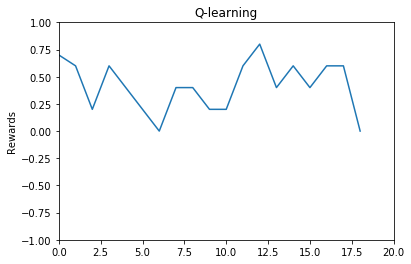

In [23]:
import matplotlib.pyplot as plt
global lis
plt.axis([0, 20, -1, 1])
plt.plot(lis)
plt.ylabel('Rewards')
plt.title("Q-learning")
plt.show()

In [26]:
print(lis)

[0.7, 0.6, 0.2, 0.6, 0.4, 0.2, 0.0, 0.4, 0.4, 0.2, 0.2, 0.6, 0.8, 0.4, 0.6, 0.4, 0.6, 0.6, 0.0]


In [30]:
sum=0
global lis
for i in range(0,len(lis),1):
    sum+=lis[i]
print(sum/len(lis))

0.4157894736842105
